## Text to Image

In [3]:
from PIL import Image, ImageDraw, ImageFont
from PIL import features
import os

In [4]:
def text_to_image(text, font_path, height=100, padding=10):
    font = ImageFont.truetype(font_path, size=90, layout_engine=ImageFont.Layout.RAQM)
    temp_image = Image.new("L", (1, 1), color=255)
    draw = ImageDraw.Draw(temp_image)
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    image_width = text_width + 2 * padding
    image_height = height
    image = Image.new("L", (image_width, image_height), color=255)
    draw = ImageDraw.Draw(image)
    text_position = (padding, (image_height - text_height) // 2)
    draw.text(text_position, text, font=font, fill=0)
    return image

def resize_and_pad(image, target_size=(256, 256)):
    original_size = image.size
    ratio = min(target_size[0] / original_size[0], target_size[1] / original_size[1])
    new_size = (int(original_size[0] * ratio), int(original_size[1] * ratio))
    resized_image = image.resize(new_size, Image.Resampling.LANCZOS)
    new_image = Image.new("L", target_size, color=255)
    top_left_x = (target_size[0] - new_size[0] + 10) // 2  # Horizontal center
    top_left_y = (target_size[1] - new_size[1]) // 2  # Vertical center
    new_image.paste(resized_image, (top_left_x, top_left_y))
    return new_image

In [5]:
def createImg(word, font_path):
    image = text_to_image(word, font_path)
    image = resize_and_pad(image)
    return image

# font_path = os.path.join(os.path.dirname(__file__), "Amiko-Regular.ttf")
font_path = "./Fonts/Amiko-Regular.ttf"
img = createImg("खनिज", font_path)
import numpy
import matplotlib.pyplot as plt
# plt.imshow(numpy.array(img), cmap="gray")

## Image to HT


#### lol

In [6]:
import os
import torch
import numpy as np
from PIL import Image
import torch.nn as nn
from tqdm import tqdm
import torch.optim as optim
import matplotlib.pyplot as plt
from Generator import Generator
from utils import load_checkpoint
from torch.utils.data import DataLoader

import albumentations as A
from albumentations.pytorch import ToTensorV2

In [7]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
LEARNING_RATE = 2e-4
MODEL_DIR = "./Models/gen.pth.tar"

gen = Generator(in_channels=1, features=64).to(DEVICE)
gen.eval()
opt_gen = optim.Adam(gen.parameters(), lr=LEARNING_RATE, betas=(0.5, 0.999))
load_checkpoint(os.path.normpath(os.path.join(os.getcwd(), MODEL_DIR)), gen, opt_gen, LEARNING_RATE, device=DEVICE)

=> Loading checkpoint


In [8]:
transform_only_input = A.Compose([A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], max_pixel_value=255.0,), ToTensorV2(),])

load img

In [9]:
# img = np.asarray(Image.open("./Images/3.png"))
img = np.asarray(img)
img = transform_only_input(image=img)["image"]
img = img.unsqueeze(0)
img.shape

torch.Size([1, 1, 256, 256])

In [ ]:
x = img.to(DEVICE)
print(x.shape)
print(x)

# Train Discriminator
with torch.amp.autocast('cuda'):
    y_fake = gen(x)

#### lol

(<Axes: >, <matplotlib.image.AxesImage at 0x2608c031110>)

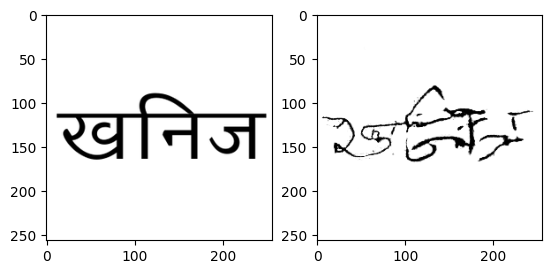

In [ ]:
plt.subplot(1, 2, 1), plt.imshow(x[0].detach().cpu().numpy()[0], cmap="gray")
plt.subplot(1, 2, 2), plt.imshow(y_fake[0].detach().cpu().numpy()[0], cmap="gray")

In [1]:
def add_green_borders(image):
    # Convert the image to a numpy array
    img_array = np.array(image)

    # Get image dimensions
    height, width = img_array.shape
    
    # Define the "green" border intensity (in grayscale, we use a value, e.g., 255 for white)
    green_intensity = 20  # You can set this to another value if you want a different effect
    
    # Modify the borders (top, bottom, left, right)
    img_array[0, :] = green_intensity  # Top border
    img_array[-1, :] = green_intensity  # Bottom border
    img_array[:, 0] = green_intensity  # Left border
    img_array[:, -1] = green_intensity  # Right border
    
    # Convert the modified numpy array back to an image
    result_image = Image.fromarray(img_array)
    return result_image

c:\Users\devbh\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\devbh\AppData\Local\Programs\Python\Python311\Lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


=> Loading checkpoint


c:\Users\devbh\OneDrive\Desktop\College\Sem 5\Projects\Pix2Pix Tex2HT\utils.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_file, map_

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


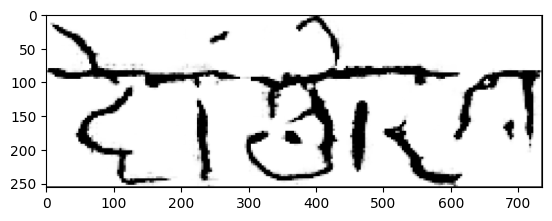

In [2]:
from createSrcImg import getWordImage
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

temp = getWordImage("देखिए।")
img_array = np.asarray(temp)

plt.imshow(add_green_borders(Image.fromarray(img_array)), cmap="gray")

In [20]:
hindi_words = [
    "घर", "सपना", "समाज", "धन", "जीवन", "सपने", "हाथ", "आदमी", "भारत", "देश",
    "शक्ति", "सिद्धि", "प्रेम", "कर्म", "शांति", "उत्सव", "खुश", "प्रकृति", "सौंदर्य", "संस्कार",
    "अर्थ", "समय", "ज्ञान", "विश्वास", "विकास", "साहस", "उम्मीद", "सपना", "आशा", "सपनों"
]

img_arr = []

for word in hindi_words:
    img_arr.append(np.asarray(getWordImage(word)))

In [4]:
import re

def filter_hindi_letters(sentence):
    # Regular expression to match only Hindi letters and spaces
    hindi_letters_only = re.sub(r'[^\u0900-\u097F\s]+', '', sentence)
    return hindi_letters_only


sentence = "यह एक उदाहरण,/?""':;<>123()*&^%$#@! है! इसे देखिए।"
filtered_sentence = filter_hindi_letters(sentence).split()
print(filtered_sentence)


['यह', 'एक', 'उदाहरण', 'है', 'इसे', 'देखिए।']


In [ ]:
def place_words_on_canvas(font_size, sentence, canvas_width, debug=False):

    words = filter_hindi_letters(sentence).split()
    word_images = []
    for word in words:
        word_images.append(np.asarray(getWordImage(word, max_height=font_size)))
    
    words *= 10
    word_images *= 10

    # Start with an initial canvas height

    def setRatio(line_height, num):
        return round(line_height * (num / 256))
    

    line_height = font_size
    x_offset, y_offset = setRatio(line_height, 60), setRatio(line_height, 60)
    idx = 0


    
    canvas = Image.new('L', (canvas_width, line_height + setRatio(line_height, 120)), 255)  # 'L' mode for grayscale
    
    for word_img in word_images:
        contains_matras_above_shirorekha = any(char in ['ि', 'ै', 'ी', 'े', 'ृ'] for char in words[idx])
        word_pil = Image.fromarray(word_img)
        if debug:
            word_pil = add_green_borders(word_pil)
        word_width, word_height = word_pil.size

        # Check if the word exceeds the current canvas width and needs a new line
        if x_offset + word_width > canvas_width:
            x_offset = setRatio(line_height, 60)
            y_offset += line_height + np.random.randint(setRatio(line_height, 30), setRatio(line_height, 60))

            # Dynamically expand the canvas height if the new line goes beyond the current canvas height
            if y_offset + line_height > canvas.height:
                new_height = canvas.height + line_height + np.random.randint(setRatio(line_height, 30), setRatio(line_height, 60)) + setRatio(line_height, 56)
                new_canvas = Image.new('L', (canvas_width, new_height), 255)
                new_canvas.paste(canvas, (0, 0))
                canvas = new_canvas

        # Paste the word image onto the canvas
        canvas.paste(word_pil, (x_offset, y_offset if contains_matras_above_shirorekha else y_offset + setRatio(line_height, 56)))
        x_offset += word_width + np.random.randint(setRatio(line_height, 45), setRatio(line_height, 45) + (word_width * 0.1))
        
        idx += 1
    return canvas

result_canvas = place_words_on_canvas(40, " ".join(hindi_words), 500, debug=False)

result_canvas.show()

(3054, 500)
